## Exercise for Chapter 4

According to the research result **Socioeconomic development and life expectancy relationship: evidence from the EU accession candidate countries** by Goran Miladinov in Journal of Population Sciences, Genus volume 76, Article number: 2 (2020), the results show that 

* a country's population health and socioeconomic development have a significant impact on life expectancy at birth; 

* in other words, as a country's population health and socioeconomic development improves, infant mortality rates decrease, and life expectancy at birth appears to rise. 

* Through increased economic growth and development in a country, **GDP per capita raises life expectancy at birth, resulting in a longer lifespan**.

https://genus.springeropen.com/articles/10.1186/s41118-019-0071-0#:~:text=GDP%20per%20capita%20increases%20the,to%20the%20prolongation%20of%20longevity.)

In this section, we use data to attempt to gain insight on the relationship between life expectancy and gdp per capita of world countries.

Note that we will download a dataset from **Kaggle**. 

Kaggle, a Google LLC subsidiary, is an online community of data scientists and machine learning experts. Users can use Kaggle to search and publish data sets, study and construct models in a web-based data-science environment, collaborate with other data scientists and machine learning experts, and compete in data science competitions.

1. Import the Gapminder World dataset from the following link:

https://www.kaggle.com/tklimonova/gapminder-datacamp-2007?select=gapminder_full.csv

(for more detail on how to read CSV file from kaggle https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/)

In [1]:
# !pip install opendatasets

In [2]:
# import opendatasets as od

In [3]:
## od.download("https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

# od.download('https://www.kaggle.com/tklimonova/gapminder-datacamp-2007')

In [4]:
import pandas as pd
import numpy as np

In [5]:
#gapminder = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_full.csv')

url = 'https://raw.githubusercontent.com/STLinde/Anvendt-Statistik/main/gapminder_full.csv'
gapminder = pd.read_csv(url)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1091)>

In [13]:
# gapminder.head()

We will begin by looking at some of its features to get get an idea of its content.

2. How many qualitative variables are there in this Gapminder dataset?
(See for more detail:

https://www.abs.gov.au/websitedbs/D3310114.nsf/Home/Statistical+Language+-+quantitative+and+qualitative+data#:~:text=What%20are%20quantitative%20and%20qualitative,much%3B%20or%20how%20often).&text=Qualitative%20data%20are%20data%20about%20categorical%20variables%20(e.g.%20what%20type).

**Note:** It is crucial to figure out whether the data is quantitative or qualitative, as this has an impact on the statistics that can be obtained.

In [7]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [22]:
# To select object and categorical columns from a DataFrame. 
# https://stackoverflow.com/questions/53911645/get-list-of-column-names-having-either-object-or-categorical-dtype

#tmp3 = datatype[(gapminder == 'object') | (gapminder == 'category')].index.tolist()
print(gapminder.select_dtypes(include=['object', 'category']).columns)

ans2 = gapminder.select_dtypes(include=['object', 'category']).columns.size
print('Ans: The number of qualitative variables in this Gapminder dataset is', ans2)

Index(['country', 'continent'], dtype='object')
Ans: The number of qualitative variables in this Gapminder dataset is 2


3. Write Python code to create a table that gives the number of countries in each continent of **the lastest year** in this dataset.

In [17]:
# Here we use multiindex 
# See https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce

latest_year = gapminder['year'].max()

df_grouped_counted = gapminder.groupby(['year','continent']).count()

df_grouped_counted.loc[([latest_year],slice(None))][['country']]

# Assign output3 to store the result
output3 = df_grouped_counted.loc[([latest_year],slice(None))][['country']]

print(output3)

                country
year continent         
2007 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2


4. Write Python code to graphically present the results obtained in the previous question.

<AxesSubplot:xlabel='continent'>

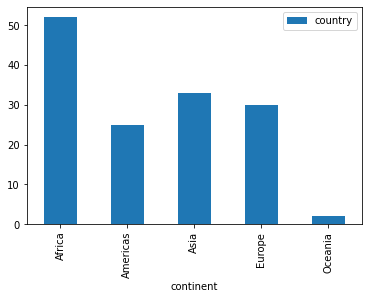

In [48]:
output3.loc[2007,:].plot.bar()

#cf with output3.plot.bar()

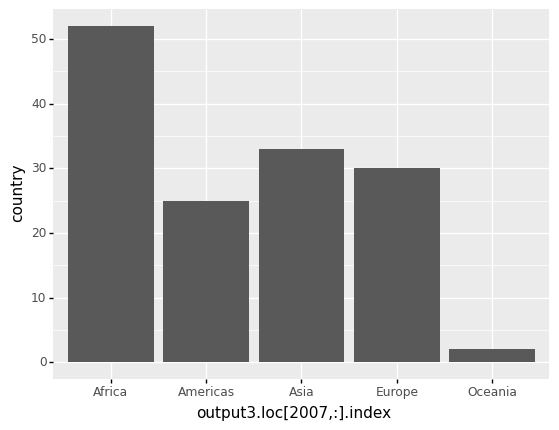

<ggplot: (300037225)>

In [24]:
# With plotnine (ggplot2)

from plotnine import *

(
    ggplot(output3.loc[2007,:])  # What data to use
    + aes(x='output3.loc[2007,:].index',y='country')  # What variable to use
    + geom_col()  # Geometric object to use for drawing
)

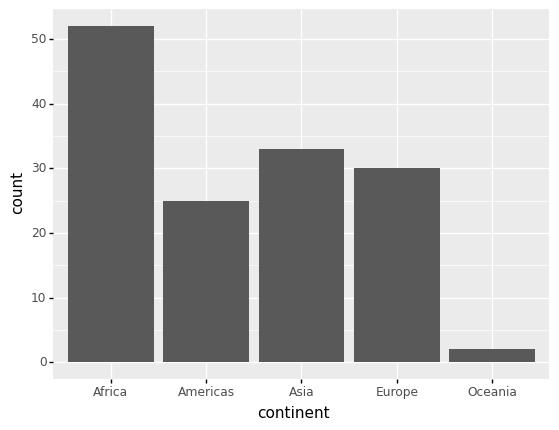

<ggplot: (314062361)>

In [55]:
gapminder[gapminder['year']==latest_year]

(
    ggplot(data = gapminder[gapminder['year']==latest_year]) +
    aes(x = 'continent') +
    geom_bar()
) 

5. **What Is GDP Per Capita?**

The per capita gross domestic product (GDP) is a financial measure that calculates a country's economic output per person by dividing its GDP by its population.

Write Python code to summarize some statistical data like percentile, mean and standard deviation of the GDP per capita of the latest year broken down by continent.

In [19]:
gapminder2007 = gapminder[gapminder['year']==latest_year]

gapminder2007[['country','continent','gdp_cap']].groupby('continent').describe()

# For output validation
# gapminder2007[gapminder2007['continent']=='Asia']['gdp_cap'].mean()

gdp_cap                                                          \
            count          mean           std           min           25%   
continent                                                                   
Africa       52.0   3089.032605   3618.163491    277.551859    862.951537   
Americas     25.0  11003.031625   9713.209302   1201.637154   5728.353514   
Asia         33.0  12473.026870  14154.937343    944.000000   2452.210407   
Europe       30.0  25054.481636  11800.339811   5937.029526  14811.898210   
Oceania       2.0  29810.188275   6540.991104  25185.009110  27497.598692   

                                                    
                    50%           75%          max  
continent                                           
Africa      1452.267078   3993.501583  13206.48452  
Americas    8948.102923  11977.574960  42951.65309  
Asia        4471.061906  22316.192870  47306.98978  
Europe     28054.065790  33817.962533  49357.19017  
Oceania    29810.188275  32122.777858  34435.36744

6. What is the average GDP per capita in Asian countries obtained above?

In [21]:
ans6 = gapminder2007[gapminder2007['continent']=='Asia']['gdp_cap'].mean()

print('Ans: The average GDP per capita in Asian countries in 2007 is', ans6)

Ans: The average GDP per capita in Asian countries in 2007 is 12473.02687013333


7. Plot the histogram for per capita GDP in each continent.

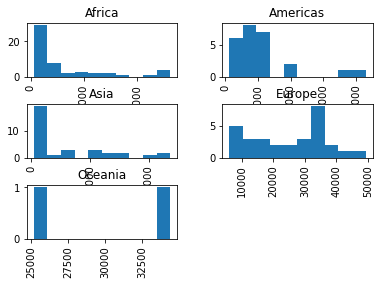

In [89]:
# See https://stackoverflow.com/questions/19584029/plotting-histograms-from-grouped-data-in-a-pandas-dataframe

result = gapminder2007['gdp_cap'].hist(by= gapminder2007['continent'])

**Notice** the different scale on the x-axis is used.

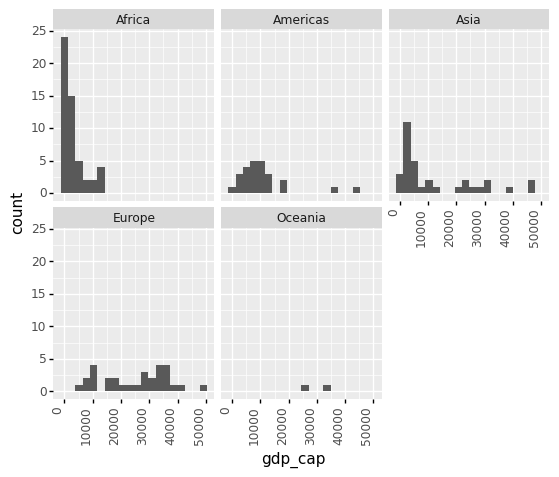

<ggplot: (308895881)>

In [30]:
(
    ggplot(data = gapminder[gapminder['year']==latest_year]) +
    aes(x='gdp_cap') +
    geom_histogram(bins=20) +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    facet_wrap('continent')
) 

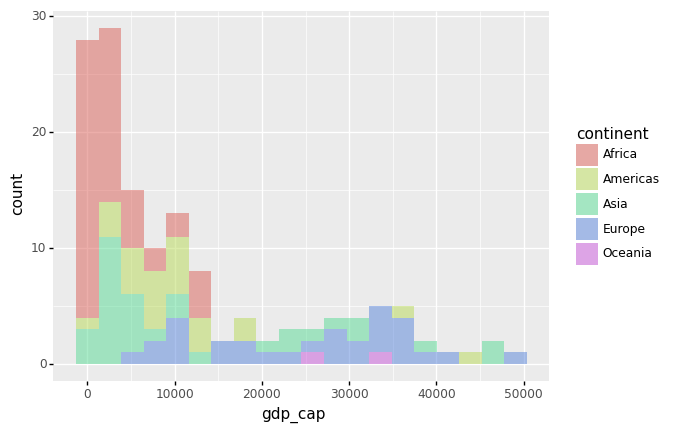

<ggplot: (308205817)>

In [25]:
# See
# https://www.r-graph-gallery.com/histogram_several_group.html

(
    ggplot(data = gapminder[gapminder['year']==latest_year]) +
    aes(x='gdp_cap', fill='continent') +
    geom_histogram(bins=20,alpha=0.5)
) 



**Extra questions for extra points (4 points):**

Complete questions 8 and 9 to earn extra points.

For the following questions, you will need to check out the lecture note in Chapter 4 and you will require to preprocess the orginal data by adding regional classfication into Gapminder dataset. Then the column `group` can then be added. 


8. Append the column called `group` that groups countries into 5 different groups as follows:

* West: ["Western Europe", "Northern Europe","Southern Europe", "Northern America",
"Australia and New Zealand"]

* East Asia: ["Eastern Asia", "South-Eastern Asia"]

* Latin America: ["Caribbean", "Central America",
"South America"]

* Sub-Saharan: [continent == "Africa"] &
[region != "Northern Africa"]

* Other: All remaining countries (also including NAN). 

In addition to the variable `continent` variable in the Gapminder dataset, we will preprocess our data by adding another variable, region, which gives a classification of countries by region.

In [34]:
gapminder_dslab = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_dslab.csv')


# url = 'https://raw.githubusercontent.com/pairote-sat/SCMA248/main/Data/gapminder_dslab.csv'
# gapminder_dslab = pd.read_csv(url)

region = gapminder_dslab.query('year== 2007')[['country','region']]
region['region'].unique()

gapminder = pd.merge(gapminder,region, how='left',on='country')

The Numpy `select` function is more powerful for creating a new column based on some conditions on the other columns. It can be used to specify a set of conditions and values. As a result, each condition can be assigned a specific value.

See 
https://towardsdatascience.com/3-methods-to-create-conditional-columns-with-python-pandas-and-numpy-a6cd4be9da53 and
https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d

Let's start by defining the conditions and their values.

In [50]:
# https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

conditions = [
    gapminder.region.isin(["Western Europe", "Northern Europe","Southern Europe", "Northern America",
"Australia and New Zealand"]),
    gapminder.region.isin(["Eastern Asia", "South-Eastern Asia"]),
    gapminder.region.isin(["Caribbean", "Central America",
"South America"] ),
    (gapminder.continent.isin(["Africa"])) & (~gapminder.region.isin(["Northern Africa"] ))
]

values = ['West','East Asia','Latin America','Sub-Saharan']

np.select(conditions,values, default="Others")


gapminder['group']=np.select(conditions,values, default="Others")

# Add dollars_per_day column:
gapminder['dollars_per_day'] = gapminder['gdp_cap']/365

9. We now want to compare the distribution across these five groups to confirm the “west versus the rest” dichotomy. To do this, we will work with the 1967 data. We could generate five histograms or five smooth density plots, but it may be more practical to have all the visual summaries **in one plot**. Write Python code to stack smooth density plots (or histograms) vertically (with slightly overlapping lines) that share the same x-axis.

We turn this group variable into a factor to control the order of the levels.

In [51]:
group_list = ["Others", "Latin America","East Asia", "Sub-Saharan", "West"]

gapminder['group'] = pd.Categorical(gapminder['group'], categories=group_list)

Two characteristics of the average income distribution in 1967 were identified by the exploratory data analysis above. We discovered a **bimodal distribution** using a histogram, with the modes corresponding to poor and rich countries. 

To confirm the "west vs the rest" dichotomy, we will compare the distribution across these five groups. A summary plot may be beneficial because the number of points in each category is large enough. 

We could make five histograms or density plots, but having all of the visual summaries in one figure may be more practical. As a result, we begin by stacking boxplots adjacent to one another.

**Note** A **boxplot** is a standard method of displaying a dataset based on a five-number summary: minimum, maximum, sample median, first and third quartiles.

In addition to the lowest and maximum values required to create a box-plot, the interquartile range (IQR), as shown in the plot, is another essential feature that can be used to create a box-plot.

As seen from the plot, a box plot normally consists of two parts: a box and a pair of whiskers. The lowest point on the box-plot (i.e. the lower whisker's boundary) represents the data set's minimum value, while the highest point (i.e. the upper whisker's boundary) represents the data set's maximum value (excluding any **outliers**). A horizontal line is drawn in the middle of the box to signify the median, which drawn from Q1 to Q3.

The whisker limits are found inside the 1.5 IQR value. Outliers are all other observed data points that are outside the whisker's boundary.

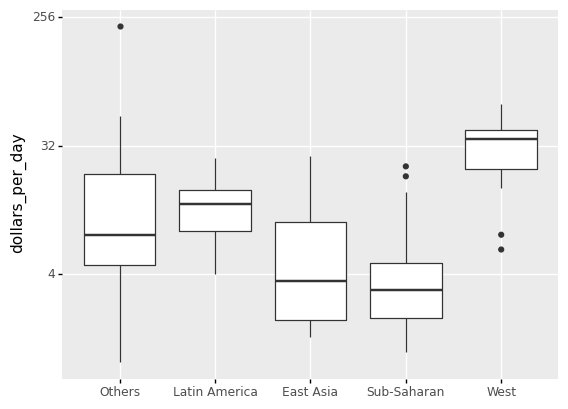

<ggplot: (298816569)>

In [52]:
gapminder1967 = gapminder.query('year == 1967')

(
    ggplot(gapminder1967) + 
    aes('group','dollars_per_day') +
    geom_boxplot() +
    scale_y_continuous(trans='log2') +
    xlab('')
)

In [53]:
#gapminder1967.query('region == polynesia')
gapminder1967.region.head()

3                 NaN
15    Southern Europe
27    Northern Africa
39      Middle Africa
51      South America
Name: region, dtype: object

The shortcoming of boxplots is that by summarizing the data into five numbers, we may miss important data properties. Showing the data is one approach to avoid this.

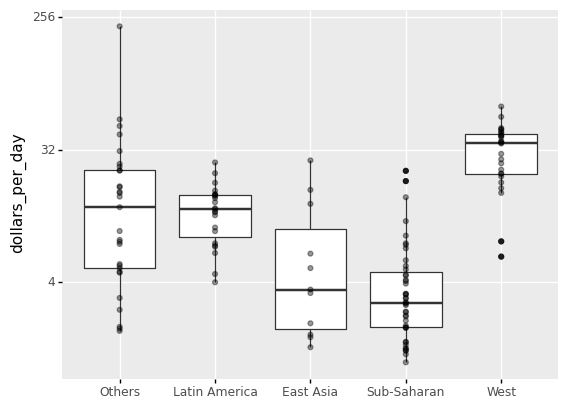

<ggplot: (309957273)>

In [85]:
(
    ggplot(gapminder1967) + 
    aes('group','dollars_per_day') +
    geom_boxplot() +
    scale_y_continuous(trans='log2') +
    xlab('') +
    geom_point(alpha=0.4)
)

In [58]:
#len(gapminder1967.region.unique())

If we are concerned that the boxplot summary is too basic, we can present smooth densities or histograms with `facet_wrap`.


**Note** if you are working with R programming, the library **ggridges** (together with ggplot) can be used to visualize distributions of several groups of a category. This allows us to stack smooth densities or histograms vetically. We refer to the stacked plot as **ridge plots**. See for an example 
https://cran.r-project.org/web/packages/ggridges/vignettes/gallery.html and
https://www.analyticsvidhya.com/blog/2021/06/ridgeline-plots-visualize-data-with-a-joy/#:~:text=Ridgeline%20Plot%20or%20Joy%20Plot,beautiful%20piece%20of%20the%20plot.


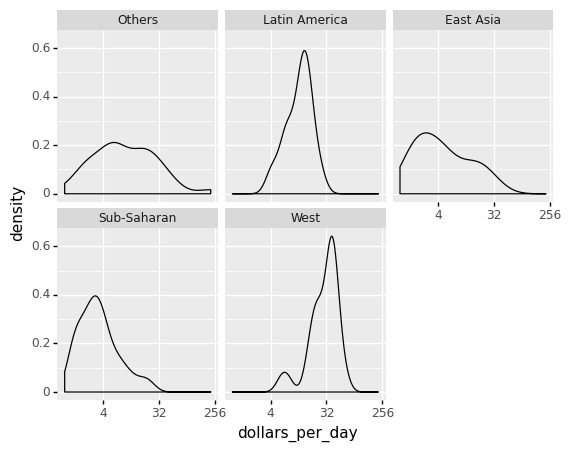

<ggplot: (308774617)>

In [59]:
(
    ggplot(gapminder1967) + aes('dollars_per_day') + 
    geom_density() +
    facet_wrap('group') +
    scale_x_continuous(trans='log2') 
)    

#### In Python, plot a ridgeline plot.

In Python, a Ridgeline Plot can be created using a variety of tools, including the popular Matplotlib and Plotly libraries. However, plotting a Ridgeline Plot with joypy is rather simple. Here is an example to the Gapminder dataset. 

See the following for more detail: https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052

In [60]:
!pip install joypy

In [61]:
from joypy import joyplot
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'dollars_per_day')

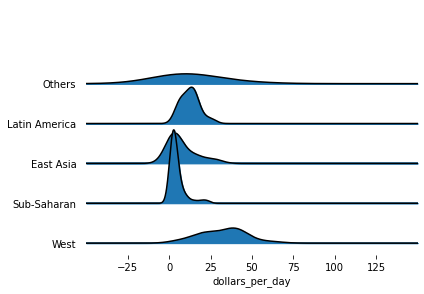

In [80]:
joyplot(gapminder1967, by='group', column='dollars_per_day', x_range=[-50,150])
plt.xlabel('dollars_per_day')